<a href="https://colab.research.google.com/github/SagarSudani/A-B-Testing-Project-Mobile-Gaming-Analytics/blob/main/A_B_testing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df= pd.read_csv("/content/cookie_cats.csv")

**Data overview**

In [ ]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
df.shape

(90189, 5)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.sum_gamerounds.describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [ ]:
df.isnull().sum()

,0
userid,0
version,0
sum_gamerounds,0
retention_1,0
retention_7,0


In [ ]:
df.groupby("version")[["sum_gamerounds","retention_1", "retention_7"]].mean()

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.456264,0.448188,0.190201
gate_40,51.298776,0.442283,0.182000


**Split Data into Groups**

In [ ]:
gate30 = df[df["version"] == "gate_30"]
gate40 = df[df["version"] == "gate_40"]

In [ ]:
print("Number of players in gate_30:", len(gate30))
print("Number of players in gate_40:", len(gate40))

Number of players in gate_30: 44700
Number of players in gate_40: 45489


**Hypothesis Testing**

**Test 1: Daily Engagement (sum_gamerounds)**

In [ ]:
t_stat, p_val = stats.ttest_ind(gate30["sum_gamerounds"], gate40["sum_gamerounds"])
print("\nT-test for Game Rounds")
print("t-statistic:", t_stat, "p-value:", p_val)


T-test for Game Rounds
t-statistic: 0.8910426211362967 p-value: 0.37290868247405207


**Test 2: Day-1 Retention (retention_1)**

In [ ]:
 #Use chi-square test for proportions
contingency1 = pd.crosstab(df["version"], df["retention_1"])
chi2_1, p_val1, _, _ = stats.chi2_contingency(contingency1)
print("\nChi-square Test for Day-1 Retention")
print("chi2:", chi2_1, "p-value:", p_val1)


Chi-square Test for Day-1 Retention
chi2: 3.1591007878782262 p-value: 0.07550476210309086


**Test 3: Day-7 Retention (retention_7)**

In [ ]:
contingency7 = pd.crosstab(df["version"], df["retention_7"])
chi2_7, p_val7, _, _ = stats.chi2_contingency(contingency7)
print("\nChi-square Test for Day-7 Retention")
print("chi2:", chi2_7, "p-value:", p_val7)


Chi-square Test for Day-7 Retention
chi2: 9.959086799559167 p-value: 0.0016005742679058301


**Simple** **Interpretation**

In [ ]:
def interpret(p):
    return "Significant difference (reject H0)" if p < 0.05 else "No significant difference (fail to reject H0)"

In [ ]:
print("\n--- Results ---")
print("Game rounds:", interpret(p_val))
print("Day-1 retention:", interpret(p_val1))
print("Day-7 retention:", interpret(p_val7))


--- Results ---
Game rounds: No significant difference (fail to reject H0)
Day-1 retention: No significant difference (fail to reject H0)
Day-7 retention: Significant difference (reject H0)


**Visualisation**

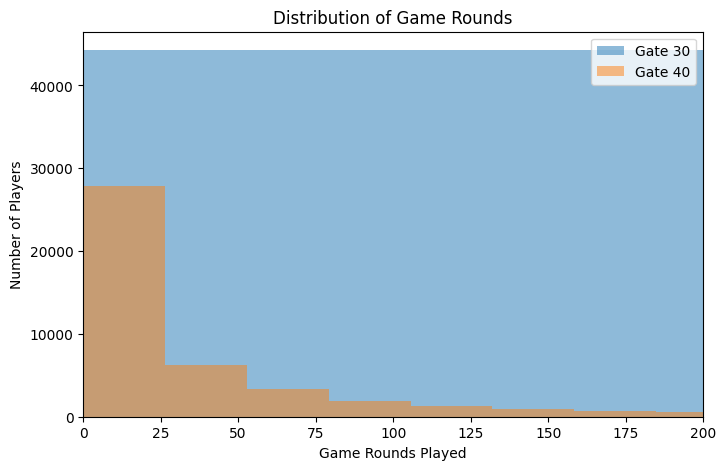

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(gate30["sum_gamerounds"], bins=100, alpha=0.5, label="Gate 30")
plt.hist(gate40["sum_gamerounds"], bins=100, alpha=0.5, label="Gate 40")
plt.xlim(0, 200)   # zoom in (remove extreme outliers)
plt.xlabel("Game Rounds Played")
plt.ylabel("Number of Players")
plt.title("Distribution of Game Rounds")
plt.legend()
plt.show()


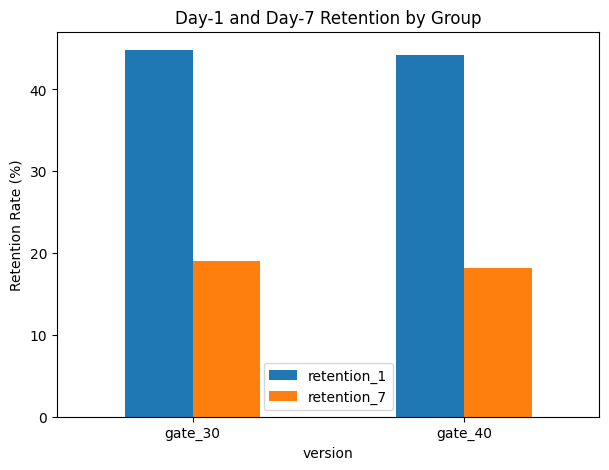

In [ ]:
retention = df.groupby("version")[["retention_1", "retention_7"]].mean() * 100

retention.plot(kind="bar", figsize=(7,5))
plt.ylabel("Retention Rate (%)")
plt.title("Day-1 and Day-7 Retention by Group")
plt.xticks(rotation=0)
plt.show()

In [ ]:
print("D1 gate_30:", gate30["retention_1"].mean())                   #actual rates
print("D1 gate_40:", gate40["retention_1"].mean())


D1 gate_30: 0.4481879194630872
D1 gate_40: 0.44228274967574577
